In [1]:
import tensorflow
from tensorflow.keras.datasets import fashion_mnist 
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

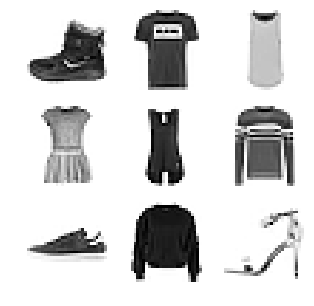

In [3]:
plt.figure(figsize = (5,5))
for k in range(9):
    plt.subplot(3,3, k+1)
    plt.imshow(train_X[k], cmap = 'Greys')
    plt.axis('off')
plt.show()

0: T-shirt/top
1: Trouser/pants
2: Pullover shirt
3: Dress
4: Coat
5: Sandal
6: Shirt
7: Sneaker
8: Bag
9: Ankle boot

In [4]:
train_Y[0:9]

array([9, 0, 0, 3, 0, 2, 7, 2, 5], dtype=uint8)

## Data Preprocessing

In [5]:
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)

In [6]:
train_X.shape

(60000, 28, 28, 1)

#### Modifying the values of each pixel such that they range from 0 to 1 will improve the rate at which our model learns.

In [7]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255
test_X = test_X / 255

#### Our model cannot work with categorical data directly. So, we must use one hot encoding. In one hot encoding, the digits 0 through 9 are represented as a set of nine zeros and a single one. The digit is determined by the location of the number 1. For example, you’d represent a 3 as [0, 0, 0, 1, 0, 0, 0, 0, 0, 0].

In [8]:
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

#### Our convolutional layers will have 64 neurons (feature maps) and a 3x3 feature detector. In turn, our pooling layers will use max pooling with a 2x2 matrix. Convolutional neural networks are almost always proceeded by an artificial neural network

In [10]:
model = Sequential()

model.add(Conv2D(64, (3,3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
#model.add(Dense(64))

model.add(Dense(10))
model.add(Activation('softmax'))

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
activation_2 (Activation)    (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_3 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)             

In [12]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics=['accuracy'])

In [13]:
model.fit(train_X, train_Y_one_hot, batch_size=64, epochs=10)


Epoch 1/10
938/938 [==============================] - 38s 41ms/step - loss: 0.5109 - accuracy: 0.8187
Epoch 2/10
938/938 [==============================] - 39s 41ms/step - loss: 0.3393 - accuracy: 0.8786
Epoch 3/10
938/938 [==============================] - 39s 41ms/step - loss: 0.3006 - accuracy: 0.8915
Epoch 4/10
938/938 [==============================] - 39s 42ms/step - loss: 0.2736 - accuracy: 0.9010
Epoch 5/10
938/938 [==============================] - 39s 41ms/step - loss: 0.2523 - accuracy: 0.9090
Epoch 6/10
938/938 [==============================] - 40s 42ms/step - loss: 0.2369 - accuracy: 0.9133
Epoch 7/10
938/938 [==============================] - 39s 42ms/step - loss: 0.2178 - accuracy: 0.9207
Epoch 8/10
938/938 [==============================] - 40s 42ms/step - loss: 0.2064 - accuracy: 0.9251
Epoch 9/10
938/938 [==============================] - 40s 42ms/step - loss: 0.1948 - accuracy: 0.9292
Epoch 10/10
938/938 [==============================] - 39s 42ms/step - loss: 0.183

In [14]:
test_loss, test_acc = model.evaluate(test_X, test_Y_one_hot)
print('Test loss', test_loss)
print('Test accuracy', test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.2749 - accuracy: 0.9022
Test loss 0.2749421000480652
Test accuracy 0.9021999835968018


## Predictions

In [19]:
predictions = model.predict(test_X)
print(np.argmax(np.round(predictions[22])))

7


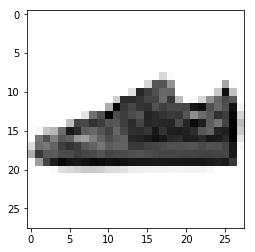

In [20]:
plt.imshow(test_X[22].reshape(28,28), cmap = 'Greys')